In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [71]:
torch.manual_seed(42)

In [72]:
train_path = "training.csv"
test_path = "test.csv"

In [73]:
from torchvision import transforms
from torch.utils.data import DataLoader
from data_utils import FacialKeypointsDataset

BATCH_SIZE = 128

train_dataset = FacialKeypointsDataset(data_path=train_path, train=True)

In [74]:
from data_utils import mean_std

mean, std = mean_std(DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False))

mean: tensor([54.7852]), std: tensor([25.8161])


In [75]:
train_dataset = FacialKeypointsDataset(data_path=train_path, transform=transforms.Normalize(mean=mean, std=std), train=True)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

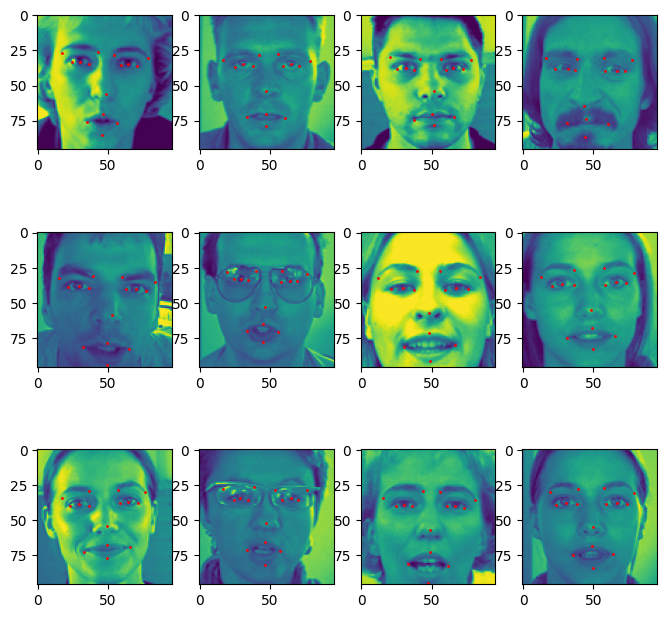

In [76]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    img, keypoints = train_dataset[i]
    x = keypoints[0::2]
    y = keypoints[1::2]
    img = img.permute(1, 2, 0)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.scatter(x, y, c="red", s=1)
plt.show()

In [77]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [78]:
# Can be used to calculate output sizes after each layer
def calc_size(input_size, kernel_size, padding, stride):
    return (input_size + 2* padding - kernel_size + 1) / stride

calc_size(4, 3, 0, 1)

2.0

In [84]:
import torchmetrics
from train_loop import train_loop
from model_1 import CnnModel

EPOCHS = 50
LEARNING_RATE = 0.1
WEIGHT_DECAY = 0.001

model = CnnModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98)
criterion = nn.MSELoss().to(device)

model1_results = train_loop(
    train_dataloader,
    model,
    optimizer,
    criterion,
    epochs=EPOCHS,
    device=device
)

Starting training loop. Epochs: 50, batches: 56


  2%|▏         | 1/50 [00:01<00:51,  1.04s/it]

Total epoch[1] loss: 6379.82080078125, Average batch loss: 113.92537689208984


  4%|▍         | 2/50 [00:01<00:45,  1.06it/s]

Total epoch[2] loss: 727.4679565429688, Average batch loss: 12.990499496459961


  6%|▌         | 3/50 [00:02<00:42,  1.10it/s]

Total epoch[3] loss: 686.4283447265625, Average batch loss: 12.257649421691895


  8%|▊         | 4/50 [00:03<00:41,  1.12it/s]

Total epoch[4] loss: 623.98388671875, Average batch loss: 11.142569541931152


 10%|█         | 5/50 [00:04<00:39,  1.13it/s]

Total epoch[5] loss: 733.9032592773438, Average batch loss: 13.105416297912598


 12%|█▏        | 6/50 [00:05<00:38,  1.14it/s]

Total epoch[6] loss: 644.3048095703125, Average batch loss: 11.505443572998047


 14%|█▍        | 7/50 [00:06<00:37,  1.15it/s]

Total epoch[7] loss: 760.43408203125, Average batch loss: 13.579180717468262


 16%|█▌        | 8/50 [00:07<00:36,  1.15it/s]

Total epoch[8] loss: 568.0521850585938, Average batch loss: 10.143789291381836


 18%|█▊        | 9/50 [00:07<00:35,  1.16it/s]

Total epoch[9] loss: 545.8807373046875, Average batch loss: 9.747870445251465


 20%|██        | 10/50 [00:08<00:34,  1.16it/s]

Total epoch[10] loss: 533.0223999023438, Average batch loss: 9.518257141113281


 22%|██▏       | 11/50 [00:09<00:33,  1.16it/s]

Total epoch[11] loss: 541.7051391601562, Average batch loss: 9.673306465148926


 24%|██▍       | 12/50 [00:10<00:32,  1.16it/s]

Total epoch[12] loss: 574.6220092773438, Average batch loss: 10.261107444763184


 26%|██▌       | 13/50 [00:11<00:31,  1.16it/s]

Total epoch[13] loss: 592.6751708984375, Average batch loss: 10.58348560333252


 28%|██▊       | 14/50 [00:12<00:30,  1.16it/s]

Total epoch[14] loss: 526.8047485351562, Average batch loss: 9.407228469848633


 30%|███       | 15/50 [00:13<00:30,  1.16it/s]

Total epoch[15] loss: 487.5759582519531, Average batch loss: 8.706713676452637


 32%|███▏      | 16/50 [00:13<00:29,  1.16it/s]

Total epoch[16] loss: 496.9260559082031, Average batch loss: 8.873680114746094


 34%|███▍      | 17/50 [00:14<00:28,  1.16it/s]

Total epoch[17] loss: 498.58087158203125, Average batch loss: 8.903230667114258


 36%|███▌      | 18/50 [00:15<00:27,  1.16it/s]

Total epoch[18] loss: 542.2216186523438, Average batch loss: 9.68252944946289


 38%|███▊      | 19/50 [00:16<00:26,  1.16it/s]

Total epoch[19] loss: 485.7312316894531, Average batch loss: 8.673772811889648


 40%|████      | 20/50 [00:17<00:25,  1.16it/s]

Total epoch[20] loss: 486.0254211425781, Average batch loss: 8.679025650024414


 42%|████▏     | 21/50 [00:18<00:24,  1.16it/s]

Total epoch[21] loss: 467.3851318359375, Average batch loss: 8.346163749694824


 44%|████▍     | 22/50 [00:19<00:24,  1.16it/s]

Total epoch[22] loss: 450.11431884765625, Average batch loss: 8.037755966186523


 46%|████▌     | 23/50 [00:19<00:23,  1.16it/s]

Total epoch[23] loss: 462.1961669921875, Average batch loss: 8.253503799438477


 48%|████▊     | 24/50 [00:20<00:22,  1.16it/s]

Total epoch[24] loss: 443.5338134765625, Average batch loss: 7.9202470779418945


 50%|█████     | 25/50 [00:21<00:21,  1.16it/s]

Total epoch[25] loss: 434.2277526855469, Average batch loss: 7.754067420959473


 52%|█████▏    | 26/50 [00:22<00:20,  1.16it/s]

Total epoch[26] loss: 420.4283447265625, Average batch loss: 7.5076494216918945


 54%|█████▍    | 27/50 [00:23<00:19,  1.16it/s]

Total epoch[27] loss: 443.8816833496094, Average batch loss: 7.926458835601807


 56%|█████▌    | 28/50 [00:24<00:19,  1.16it/s]

Total epoch[28] loss: 411.8970031738281, Average batch loss: 7.355303764343262


 58%|█████▊    | 29/50 [00:25<00:18,  1.16it/s]

Total epoch[29] loss: 390.54498291015625, Average batch loss: 6.974018096923828


 60%|██████    | 30/50 [00:26<00:17,  1.16it/s]

Total epoch[30] loss: 375.2886962890625, Average batch loss: 6.701584339141846


 62%|██████▏   | 31/50 [00:26<00:16,  1.15it/s]

Total epoch[31] loss: 366.1913146972656, Average batch loss: 6.539130687713623


 64%|██████▍   | 32/50 [00:27<00:15,  1.16it/s]

Total epoch[32] loss: 363.83203125, Average batch loss: 6.497000694274902


 66%|██████▌   | 33/50 [00:28<00:14,  1.16it/s]

Total epoch[33] loss: 372.7373046875, Average batch loss: 6.6560235023498535


 68%|██████▊   | 34/50 [00:29<00:13,  1.16it/s]

Total epoch[34] loss: 372.4920959472656, Average batch loss: 6.651644706726074


 70%|███████   | 35/50 [00:30<00:12,  1.16it/s]

Total epoch[35] loss: 460.89288330078125, Average batch loss: 8.230230331420898


 72%|███████▏  | 36/50 [00:31<00:12,  1.16it/s]

Total epoch[36] loss: 472.1726989746094, Average batch loss: 8.431655883789062


 74%|███████▍  | 37/50 [00:32<00:11,  1.16it/s]

Total epoch[37] loss: 331.7280578613281, Average batch loss: 5.923715591430664


 76%|███████▌  | 38/50 [00:32<00:10,  1.16it/s]

Total epoch[38] loss: 343.0919189453125, Average batch loss: 6.126641750335693


 78%|███████▊  | 39/50 [00:33<00:09,  1.15it/s]

Total epoch[39] loss: 347.2494812011719, Average batch loss: 6.200883865356445


 80%|████████  | 40/50 [00:34<00:08,  1.16it/s]

Total epoch[40] loss: 331.80633544921875, Average batch loss: 5.925113201141357


 82%|████████▏ | 41/50 [00:35<00:07,  1.15it/s]

Total epoch[41] loss: 334.9593811035156, Average batch loss: 5.981417655944824


 84%|████████▍ | 42/50 [00:36<00:07,  1.14it/s]

Total epoch[42] loss: 330.3126220703125, Average batch loss: 5.898439884185791


 86%|████████▌ | 43/50 [00:37<00:06,  1.15it/s]

Total epoch[43] loss: 334.5997314453125, Average batch loss: 5.9749956130981445


 88%|████████▊ | 44/50 [00:38<00:05,  1.15it/s]

Total epoch[44] loss: 321.4298400878906, Average batch loss: 5.739819049835205


 90%|█████████ | 45/50 [00:39<00:04,  1.15it/s]

Total epoch[45] loss: 354.7782287597656, Average batch loss: 6.335325717926025


 92%|█████████▏| 46/50 [00:39<00:03,  1.15it/s]

Total epoch[46] loss: 329.48602294921875, Average batch loss: 5.883679389953613


 94%|█████████▍| 47/50 [00:40<00:02,  1.16it/s]

Total epoch[47] loss: 312.910400390625, Average batch loss: 5.587686061859131


 96%|█████████▌| 48/50 [00:41<00:01,  1.16it/s]

Total epoch[48] loss: 314.6731262207031, Average batch loss: 5.6191630363464355


 98%|█████████▊| 49/50 [00:42<00:00,  1.16it/s]

Total epoch[49] loss: 336.4336853027344, Average batch loss: 6.007744789123535


100%|██████████| 50/50 [00:43<00:00,  1.15it/s]

Total epoch[50] loss: 323.0986633300781, Average batch loss: 5.769619464874268
Finished Training


In [80]:
test_dataset = FacialKeypointsDataset(data_path=test_path, train=False)
test_dataloader = DataLoader(test_dataset, batch_size=12, shuffle=False)

In [81]:
def print_predicted_keypoints(model, dataloader):

    test_batch = next(iter(dataloader)).to(device)
    test_preds = model(test_batch)

    fig = plt.figure(figsize=(8, 8))
    columns = 4
    rows = 3
    for i in range(1, columns*rows +1):
        img = test_batch[i-1].cpu().detach()
        keypoints = test_preds[i-1].cpu().detach()
        x = keypoints[0::2]
        y = keypoints[1::2]
        img = img.permute(1, 2, 0)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.scatter(x, y, c="red", s=1)
    plt.show()

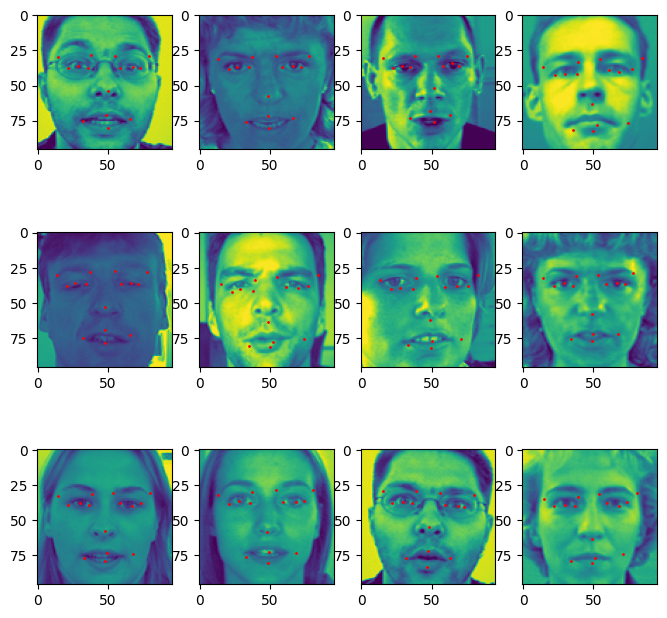

In [82]:
print_predicted_keypoints(model, test_dataloader)

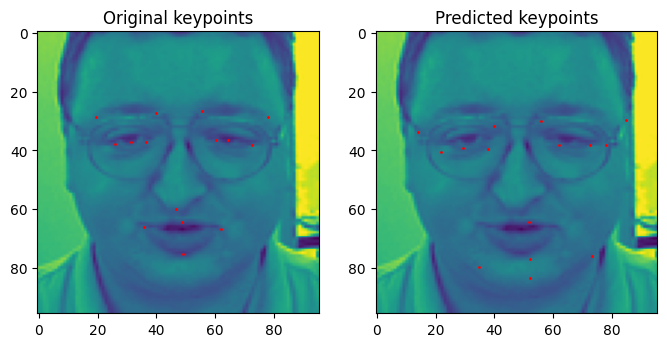

tensor(32.1135)

In [83]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 1

img, keypoints = train_dataset[50]
x = keypoints[0::2]
y = keypoints[1::2]

pred_keypoints = model(img.unsqueeze(dim=0).to(device)).squeeze().cpu().detach()

img = img.permute(1, 2, 0)
fig.add_subplot(rows, columns, 1)
plt.imshow(img)
plt.title(label='Original keypoints')
plt.scatter(x, y, c="red", s=1)

x = pred_keypoints[0::2]
y = pred_keypoints[1::2]
fig.add_subplot(rows, columns, 2)
plt.imshow(img)
plt.title('Predicted keypoints')
plt.scatter(x, y, c="red", s=1)

plt.show()
criterion(keypoints, pred_keypoints)
